In [1]:
#import statements
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt
from cvxopt import matrix
from cvxopt import solvers
from numpy.linalg import norm

In [2]:
#inputs from hw7
x = random.uniform(0,1, (100,2))

In [3]:
#desired outputs from hw7
d = np.empty([100,1])
positive = []
negative = []

for i in range(100):
    if( x[i,1] < (0.2*math.sin(10*x[i,0])+0.3) or (math.pow(x[i,1]-0.8,2)+math.pow(x[i,0]-0.5,2))<(0.15*0.15)):
        d[i] = 1
        positive.append(x[i])
    else:
        d[i] = -1
        negative.append(x[i])

In [4]:
positive = np.asarray(positive)
negative = np.asarray(negative)
len(negative[:,0])

60

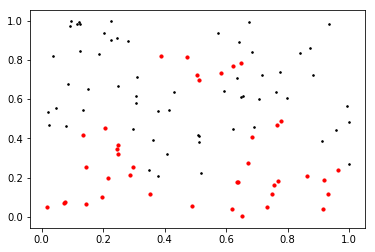

In [5]:
plt.scatter(positive[:,0], positive[:,1], label= "cross", color= "red", marker= ".", s= 40)
plt.scatter(negative[:,0], negative[:,1], label= "dot", color= "black",  
            marker= ".", s= 10)
plt.show()

In [9]:
np.shape(positive)[0]

40

In [50]:
#initializing 10 centers for positive class
positiveSet = set()
centres_positive = []
while len(positiveSet) < 10:
    positiveSet.add(random.randint(0, np.shape(positive)[0]))
    
for i in positiveSet:
    centres_positive.append(positive[i])
centres_positive = np.asarray(centres_positive)


In [51]:
#initiliasing centres for negative class
#set of centres to get unique center points
negativeSet = set()
centres_negative = []

while len(negativeSet) < 10:
    negativeSet.add(random.randint(0, np.shape(negative)[0]))

for i in negativeSet:
    centres_negative.append(negative[i])

centres_negative = np.asarray(centres_negative)
print(centres_negative)


[[0.88143174 0.72313616]
 [0.03657722 0.81752501]
 [0.68307917 0.84044977]
 [0.0856058  0.67804229]
 [0.12631061 0.84692958]
 [0.9932577  0.56636878]
 [0.30575411 0.57928321]
 [0.18543922 0.83099724]
 [0.67401072 0.99118219]
 [0.28099224 0.89365307]]


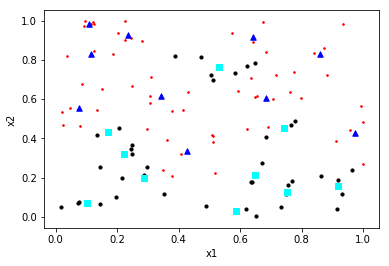

In [135]:
#plotting negative and positive centres, along with positive and negative points

plt.scatter(positive[:,0], positive[:,1], label= "Class: 1", color= "black",  
            marker= ".", s= 40)
plt.scatter(negative[:,0], negative[:,1], label= "Class: -1", color= "red",  
            marker= ".", s= 10)
plt.scatter(centres_positive[:,0], centres_positive[:,1], label= "Centres: 1", color= "cyan",  
            marker= "s", s= 30)
plt.scatter(centres_negative[:,0], centres_negative[:,1], label= "Centres: -1", color= "blue",  
            marker= "^", s= 30)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [110]:
centres_negative.shape

(10, 2)

In [111]:
np.shape(positive)[0]

40

In [116]:
#k means method
def kmeans(points, centres):
    prev = centres-1
    v = []
    z = []
    
    k = 1
    lab = np.zeros(np.shape(points)[0])
    while(not(np.array_equal(prev,centres))):

        
        prev = np.copy(centres)
        for i in range(0,np.shape(points)[0]):
            t=math.inf
            for j in range(0,np.shape(centres)[0]):
                if(np.linalg.norm(points[i]-centres[j])<t):
                    #setting min distance from centre so far
                    t=np.linalg.norm(points[i]-centres[j])
                    
                    lab[i]=j
        
        for i in range(0,np.shape(centres)[0]):
            points_in_centre = [points[j] for j in range(0,np.shape(points)[0]) if lab[j] == i]
            
            centres[i] = np.mean(points_in_centre, axis=0) 
            
        k=k+1
    return centres

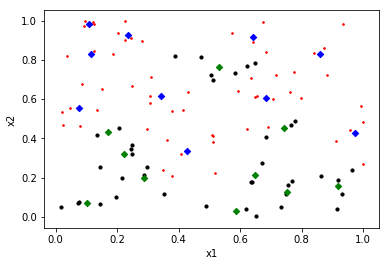

In [117]:
c_pos_final = kmeans(positive[:],centres_positive[:])
c_neg_final = kmeans(negative[:],centres_negative[:])
plt.scatter(positive[:,0], positive[:,1], label= "Class: 1", color= "black",  
            marker= ".", s= 40)
plt.scatter(negative[:,0], negative[:,1], label= "Class: -1", color= "red",  
            marker= ".", s= 10)
plt.scatter(c_pos_final[:,0], c_pos_final[:,1], label= "Centres: 1", color= "green",  
            marker= "D", s= 20)
plt.scatter(c_neg_final[:,0], c_neg_final[:,1], label= "Centres: -1", color= "blue",  
            marker= "D", s= 20)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [118]:
#calculating phi and rbf distance
centers = np.concatenate((c_pos_final,c_neg_final),axis=0)
sigma = 0.1

phi = np.zeros([100,20])
for i in range(0,100):
    for j in range(0,20):
        phi[i][j] = np.exp(-(np.linalg.norm(x[i,:]-centers[j])**2)/sigma**2)

phi = np.concatenate((np.ones([100,1]),phi),axis=1)

In [119]:
#initialising weights and biases to be calculated
w = np.random.uniform(-1, 1 ,(21,1))

In [120]:
centers[0]

array([0.74243152, 0.45369921])

In [121]:
phi[0].shape

(21,)

In [122]:
#PTA
#initialise eta, epsilon, output

epsilon = 0 
eta = float(input("Enter learning rate"))
epoch = 0  
v = np.zeros([100,1])
pred = np.zeros([100,1], dtype=np.int8)
wnew = w


while True: 
    print("epoch:",epoch)
    errors = 0
    for i in range(0,100):
        wnew = np.reshape(wnew,(1,21))
        
        v[i] = np.dot(wnew,phi[i]) 
        
        wnew = np.reshape(wnew,(21,1))
        if(v[i]>0):
            pred[i] = 1
        if(v[i]==0):
            pred[i]=0
        if(v[i]<0):
            pred[i] = -1
        #counting errors in classification
        if(pred[i]!=d[i]): 
            errors = errors+1
    print("errors:",errors)
    epoch = epoch+1
    
    
    
    #update weights
    for i in range(0,100):
        if(pred[i]!=d[i]):
            
            p = np.reshape(eta*(d[i]-pred[i])*phi[i],(21,1))
            wnew = np.add(wnew, (p))
    #terminate condition
    if(errors == 0): 
        break
print (wnew)

Enter learning rate0.01
epoch: 0
errors: 55
epoch: 1
errors: 43
epoch: 2
errors: 45
epoch: 3
errors: 42
epoch: 4
errors: 42
epoch: 5
errors: 40
epoch: 6
errors: 36
epoch: 7
errors: 36
epoch: 8
errors: 42
epoch: 9
errors: 37
epoch: 10
errors: 35
epoch: 11
errors: 33
epoch: 12
errors: 33
epoch: 13
errors: 30
epoch: 14
errors: 32
epoch: 15
errors: 31
epoch: 16
errors: 28
epoch: 17
errors: 29
epoch: 18
errors: 31
epoch: 19
errors: 29
epoch: 20
errors: 24
epoch: 21
errors: 23
epoch: 22
errors: 22
epoch: 23
errors: 21
epoch: 24
errors: 19
epoch: 25
errors: 20
epoch: 26
errors: 21
epoch: 27
errors: 20
epoch: 28
errors: 16
epoch: 29
errors: 14
epoch: 30
errors: 15
epoch: 31
errors: 15
epoch: 32
errors: 15
epoch: 33
errors: 12
epoch: 34
errors: 8
epoch: 35
errors: 9
epoch: 36
errors: 11
epoch: 37
errors: 9
epoch: 38
errors: 6
epoch: 39
errors: 7
epoch: 40
errors: 8
epoch: 41
errors: 9
epoch: 42
errors: 10
epoch: 43
errors: 9
epoch: 44
errors: 7
epoch: 45
errors: 6
epoch: 46
errors: 6
epoch: 47


In [134]:
#taking new inputs to draw decision boundary
xnew = np.zeros([400,400])
x1 = np.linspace(0,1,400)
x2 = np.linspace(0,1,400)
q = []

p = []
r = []
wnew = np.reshape(wnew,(1,21))
phi_new  = np.zeros([20,1])
for i in range(len(x1)):
    for j in range(len(x2)):
        for k in range(0,20):
            phi_new[k] = np.exp(-(np.linalg.norm(np.asarray([x1[i],x2[j]])-centers[k])**2)/sigma**2)
        phi1new = np.concatenate((np.ones([1,1]),phi_new),axis=0)
        vnew = np.dot(wnew,phi1new)
        
        if(vnew>-0.02 and vnew<0.02):
            #decision boundary points
            q.append(np.asarray([x1[i],x2[j]])) 



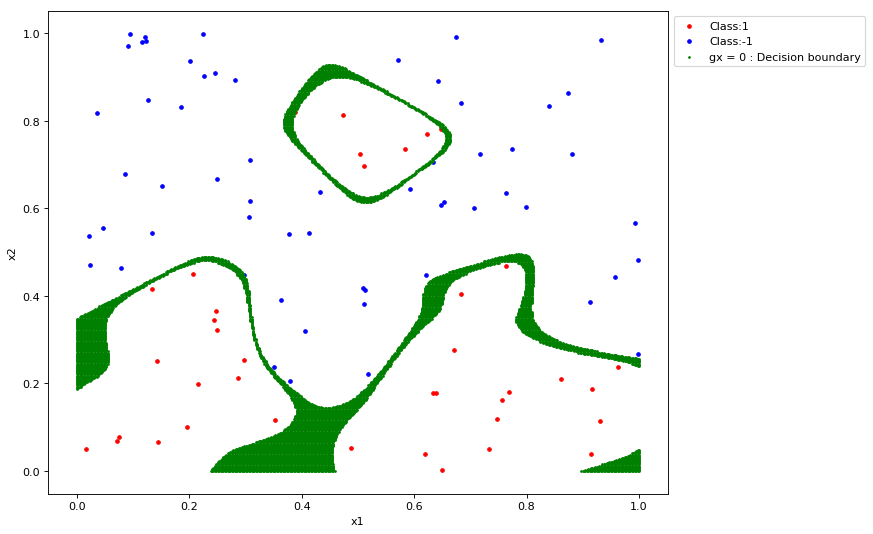

In [129]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(positive[:,0], positive[:,1], label= "Class:1", color= "red",  
            marker= ".", s= 40)
plt.scatter(negative[:,0], negative[:,1], label= "Class:-1", color= "blue",  
            marker= ".", s= 40)


q = np.asarray(q)

plt.scatter(q[:,0], q[:,1], label= "gx = 0 : Decision boundary", color= "green",marker= ".", s= 8)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc=2, bbox_to_anchor=(1,1))
plt.show()